In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [8]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [9]:
trades_df = pd.read_csv('/content/historical_data.csv')
sentiment_df = pd.read_csv('/content/fear_greed_index.csv')

In [10]:
print("Trades Dataset Shape:", trades_df.shape)
print("Sentiment Dataset Shape:", sentiment_df.shape)
print("\nTrades Columns:", trades_df.columns.tolist())
print("Sentiment Columns:", sentiment_df.columns.tolist())

Trades Dataset Shape: (27932, 16)
Sentiment Dataset Shape: (2644, 4)

Trades Columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']
Sentiment Columns: ['timestamp', 'value', 'classification', 'date']


In [11]:
trades_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12


In [12]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [13]:
# Convert the timestamp column in trades_df to datetime
trades_df['Timestamp'] = pd.to_datetime(trades_df['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')

# Create a new column with just the date
trades_df['trade_date'] = trades_df['Timestamp'].dt.date

# Convert sentiment Date column to datetime
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')
sentiment_df['Date'] = sentiment_df['Date'].dt.date

In [14]:
print("Missing values in trades:")
print(trades_df.isnull().sum())
print("\nMissing values in sentiment:")
print(sentiment_df.isnull().sum())

Missing values in trades:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            1
Crossed             1
Fee                 1
Trade ID            1
Timestamp           0
trade_date          0
dtype: int64

Missing values in sentiment:
timestamp         0
value             0
classification    0
date              0
Date              0
dtype: int64


In [15]:
print("\nTrades Sample:")
print(trades_df.head(3))
print("\nSentiment Sample:")
print(sentiment_df.head(3))


Trades Sample:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   

   Closed PnL                                   Transaction Hash  \
0         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...   
1         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...   
2         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...   

       Order ID Crossed       Fee      Trade ID           Timestamp  \
0  5.201771e+10    True  0.345404  8.95000

In [16]:
sentiment_df['classification'].unique()

array(['Fear', 'Extreme Fear', 'Neutral', 'Greed', 'Extreme Greed'],
      dtype=object)

In [17]:
sentiment_map = {'Extreme Greed': 1, 'Greed': 1, 'Neutral': 0,
                 'Fear': -1, 'Extreme Fear': -1}
sentiment_df['sentiment_score'] = sentiment_df['classification'].map(sentiment_map)

In [18]:
trades_df['notional'] = trades_df['Size Tokens'] * trades_df['Execution Price']

# Convert Closed PnL column to numeric (in case it’s a string)
trades_df['Closed PnL'] = pd.to_numeric(trades_df['Closed PnL'], errors='coerce')

# Create a win/loss column
trades_df['win'] = (trades_df['Closed PnL'] > 0).astype(int)

In [19]:
merged_df = trades_df.merge(
    sentiment_df[['Date', 'classification', 'sentiment_score']],
    left_on='trade_date',
    right_on='Date',
    how='inner'
)

In [20]:
print(f"Merged Dataset Shape: {merged_df.shape}")
print(f"Date Range: {merged_df['trade_date'].min()} to {merged_df['trade_date'].max()}")
print(f"\nSentiment Distribution:")
print(merged_df['classification'].value_counts())

Merged Dataset Shape: (27926, 22)
Date Range: 2024-03-13 to 2025-05-01

Sentiment Distribution:
classification
Fear             9317
Greed            7748
Neutral          5743
Extreme Greed    4126
Extreme Fear      992
Name: count, dtype: int64


In [21]:
print(merged_df.columns.tolist())


['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'trade_date', 'notional', 'win', 'Date', 'classification', 'sentiment_score']


In [22]:

merged_df.columns = merged_df.columns.str.strip()  # remove spaces if any

daily_metrics = merged_df.groupby(['trade_date', 'classification', 'sentiment_score']).agg({
    'Closed PnL': ['sum', 'mean', 'count'],
    'win': 'mean',
    'notional': 'sum'
}).reset_index()

In [23]:
daily_metrics.columns = [
    'date', 'sentiment', 'sentiment_score',
    'total_pnl', 'avg_pnl', 'num_trades',
    'win_rate', 'total_notional'
]


In [24]:
print("Daily Metrics Summary:")
print(daily_metrics.head())

Daily Metrics Summary:
         date      sentiment  sentiment_score   total_pnl    avg_pnl  \
0  2024-03-13  Extreme Greed                1    0.000000   0.000000   
1  2024-03-14  Extreme Greed                1   65.480454  65.480454   
2  2024-03-15  Extreme Greed                1  338.428320  42.303540   
3  2024-03-16  Extreme Greed                1  228.579840  38.096640   
4  2024-03-17  Extreme Greed                1  429.683075  30.691648   

   num_trades  win_rate  total_notional  
0           7  0.000000      6000.80226  
1           1  1.000000      6066.28230  
2           8  0.125000     26339.80583  
3           6  0.166667     27223.66214  
4          14  0.285714     87063.35357  


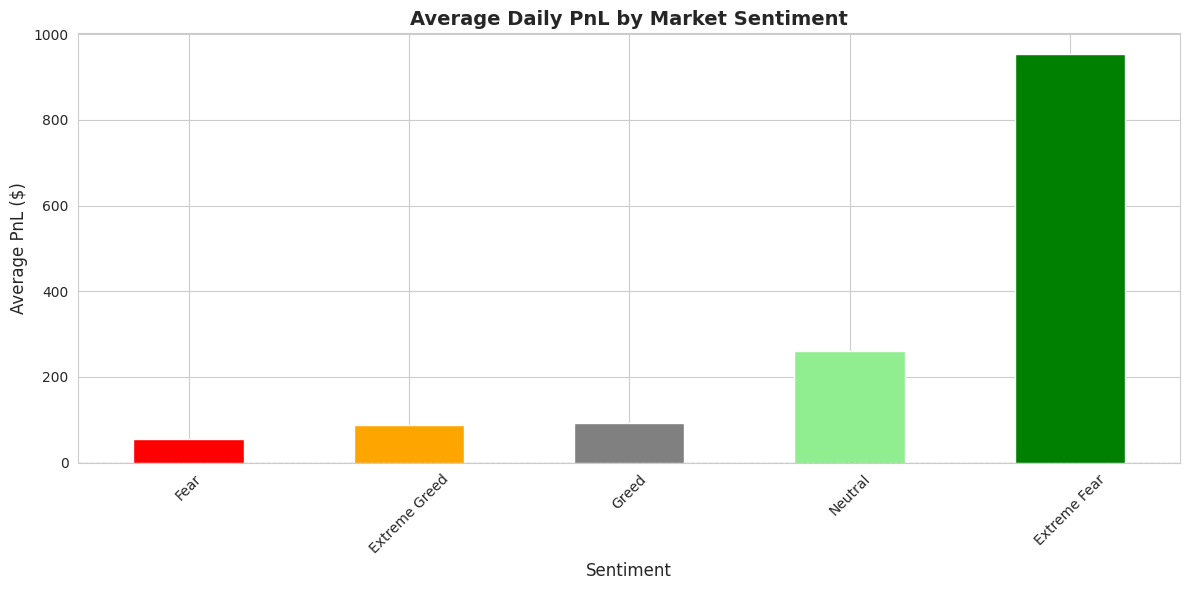

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))
sentiment_pnl = daily_metrics.groupby('sentiment')['avg_pnl'].mean().sort_values()
colors = ['red', 'orange', 'gray', 'lightgreen', 'green']
sentiment_pnl.plot(kind='bar', ax=ax, color=colors[:len(sentiment_pnl)])
ax.set_title('Average Daily PnL by Market Sentiment', fontsize=14, fontweight='bold')
ax.set_xlabel('Sentiment', fontsize=12)
ax.set_ylabel('Average PnL ($)', fontsize=12)
ax.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

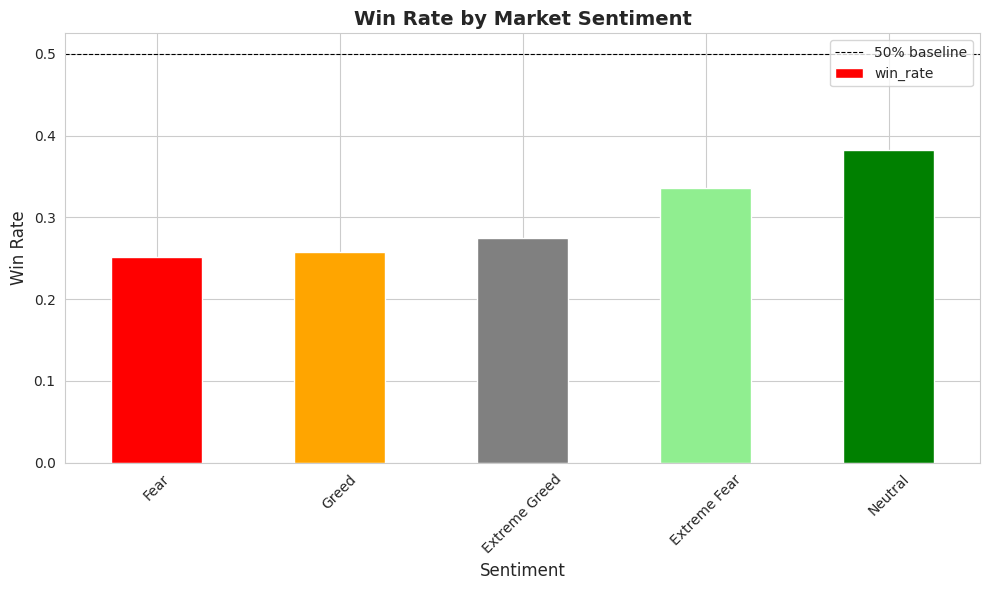

In [26]:
# Plot 2: Win Rate Under Fear vs Greed
fig, ax = plt.subplots(figsize=(10, 6))
win_rate_sentiment = daily_metrics.groupby('sentiment')['win_rate'].mean().sort_values()
win_rate_sentiment.plot(kind='bar', ax=ax, color=['red', 'orange', 'gray', 'lightgreen', 'green'][:len(win_rate_sentiment)])
ax.set_title('Win Rate by Market Sentiment', fontsize=14, fontweight='bold')
ax.set_xlabel('Sentiment', fontsize=12)
ax.set_ylabel('Win Rate', fontsize=12)
ax.axhline(y=0.5, color='black', linestyle='--', linewidth=0.8, label='50% baseline')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
print("\nWin Rate Statistics by Sentiment:")
print(daily_metrics.groupby('sentiment')['win_rate'].describe())


Win Rate Statistics by Sentiment:
               count      mean       std  min       25%       50%       75%  \
sentiment                                                                     
Extreme Fear    12.0  0.335694  0.371212  0.0  0.038793  0.222456  0.487649   
Extreme Greed   85.0  0.274167  0.257282  0.0  0.053763  0.222222  0.434783   
Fear            62.0  0.251789  0.309566  0.0  0.000000  0.130682  0.454401   
Greed          119.0  0.257422  0.290264  0.0  0.000000  0.142857  0.518519   
Neutral         54.0  0.382673  0.335195  0.0  0.000000  0.386813  0.670227   

                    max  
sentiment                
Extreme Fear   1.000000  
Extreme Greed  1.000000  
Fear           1.000000  
Greed          0.991342  
Neutral        1.000000  


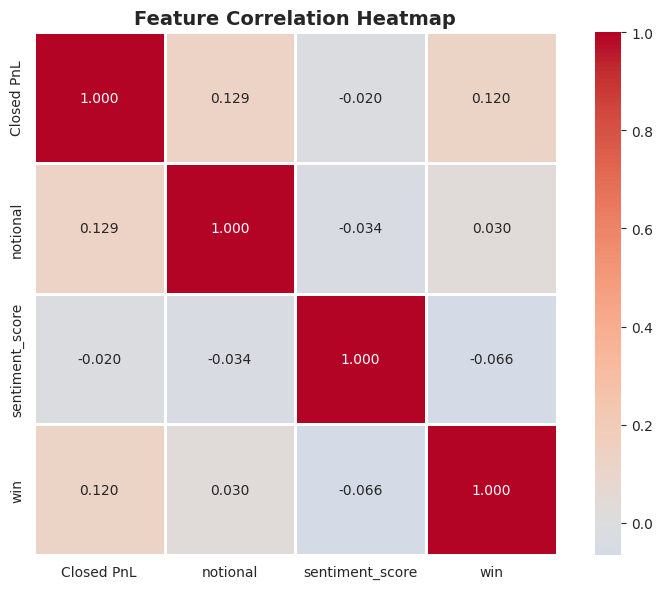

In [28]:
numeric_cols = ['Closed PnL', 'notional', 'sentiment_score', 'win']

correlation_matrix = merged_df[numeric_cols].corr()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, ax=ax, fmt='.3f')
ax.set_title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


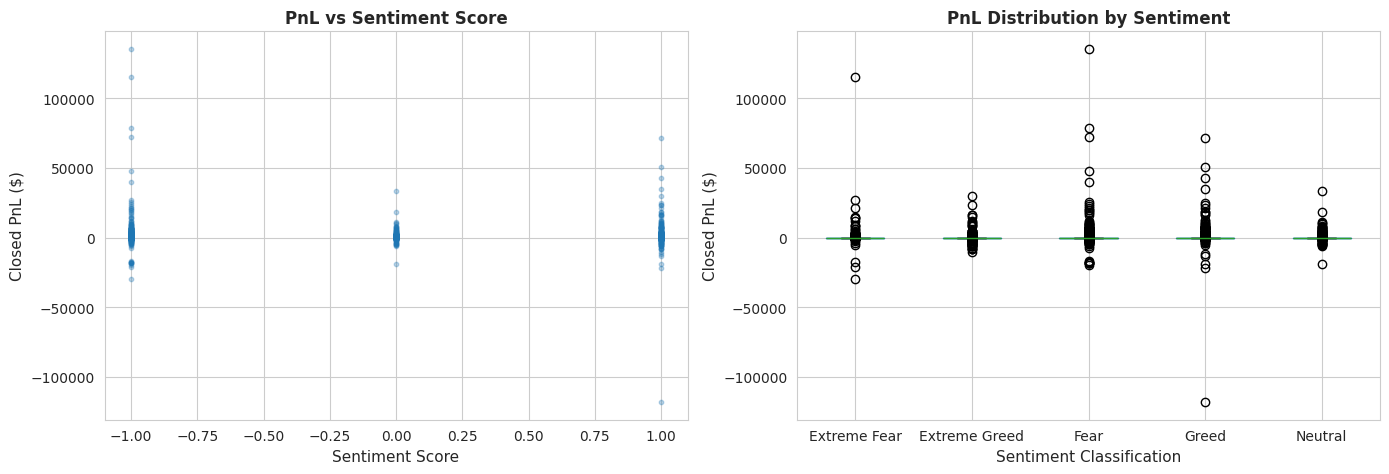

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sentiment vs PnL
axes[0].scatter(merged_df['sentiment_score'], merged_df['Closed PnL'], alpha=0.3, s=10)
axes[0].set_xlabel('Sentiment Score', fontsize=11)
axes[0].set_ylabel('Closed PnL ($)', fontsize=11)
axes[0].set_title('PnL vs Sentiment Score', fontweight='bold')

# PnL Distribution by Sentiment Classification
merged_df.boxplot(column='Closed PnL', by='classification', ax=axes[1])
axes[1].set_xlabel('Sentiment Classification', fontsize=11)
axes[1].set_ylabel('Closed PnL ($)', fontsize=11)
axes[1].set_title('PnL Distribution by Sentiment', fontweight='bold')

plt.suptitle('')
plt.tight_layout()
plt.show()

In [30]:
feature_cols = [
    'sentiment_score',
    'notional',
    'Fee',
    'Side',
    'classification'
]
X = merged_df[feature_cols].copy()
y = merged_df['win'].copy()

In [31]:
X = pd.get_dummies(X, columns=['Side', 'classification'], drop_first=True)
X = X.fillna(X.mean())

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")
print(f"Class distribution - Train: {y_train.value_counts().to_dict()}")
print(f"Class distribution - Test: {y_test.value_counts().to_dict()}")
print("Final feature columns used:", X.columns.tolist())

Training samples: 22340, Test samples: 5586
Class distribution - Train: {0: 13896, 1: 8444}
Class distribution - Test: {0: 3475, 1: 2111}
Final feature columns used: ['sentiment_score', 'notional', 'Fee', 'Side_SELL', 'classification_Extreme Greed', 'classification_Fear', 'classification_Greed', 'classification_Neutral']


In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, class_weight='balanced', solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [35]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [36]:
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Loss', 'Win']))

Model Accuracy: 0.6930

Classification Report:
              precision    recall  f1-score   support

        Loss       0.78      0.71      0.74      3475
         Win       0.58      0.67      0.62      2111

    accuracy                           0.69      5586
   macro avg       0.68      0.69      0.68      5586
weighted avg       0.70      0.69      0.70      5586



In [37]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
search = RandomizedSearchCV(rf, param_distributions=param_grid,
                            n_iter=20, cv=3, scoring='accuracy', n_jobs=-1)
search.fit(X_train, y_train)

print("Best parameters:", search.best_params_)
print("Best CV accuracy:", search.best_score_)

Best parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Best CV accuracy: 0.8128021057824654


In [40]:
best_params = search.best_params_

best_rf = RandomForestClassifier(
    **best_params,
    random_state=42,
    class_weight='balanced'
)
best_rf.fit(X_train, y_train)



RandomForestClassifier(class_weight='balanced', max_depth=20,
                       max_features='log2', min_samples_split=5,
                       n_estimators=300, random_state=42)

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = best_rf.predict(X_test)

print("Final Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Final Model Accuracy: 0.8231292517006803

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86      3475
           1       0.75      0.80      0.77      2111

    accuracy                           0.82      5586
   macro avg       0.81      0.82      0.81      5586
weighted avg       0.83      0.82      0.82      5586


Confusion Matrix:
 [[2918  557]
 [ 431 1680]]


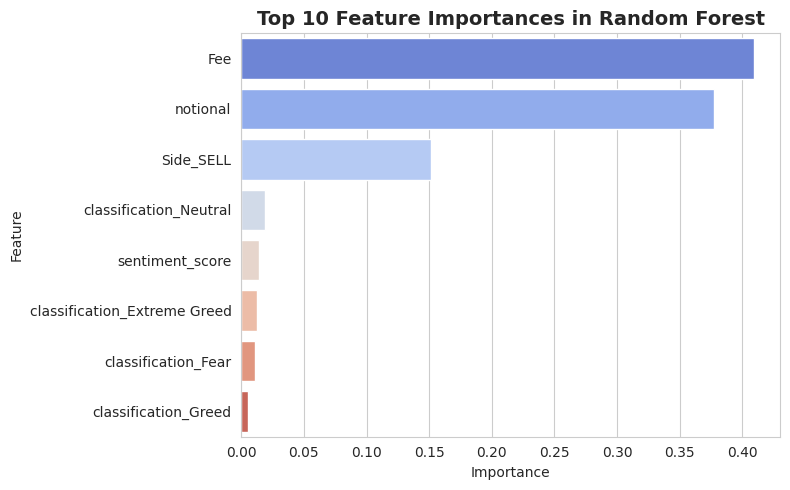

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importances = pd.Series(best_rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_features.values, y=top_features.index, palette='coolwarm')
plt.title("Top 10 Feature Importances in Random Forest", fontsize=14, fontweight='bold')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


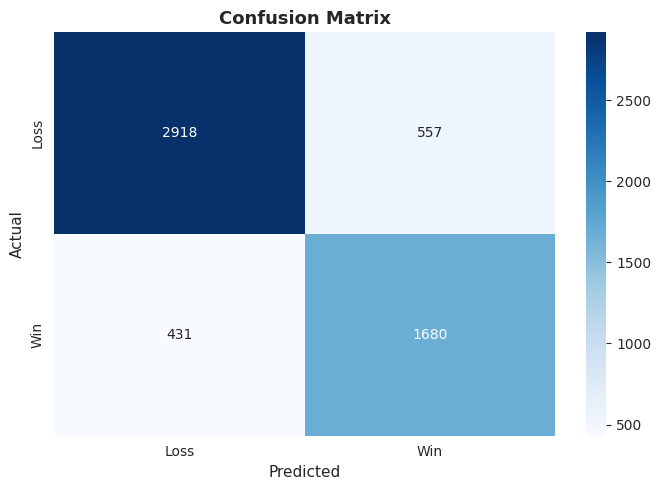

In [43]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
            xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
ax.set_title('Confusion Matrix', fontsize=13, fontweight='bold')
ax.set_xlabel('Predicted', fontsize=11)
ax.set_ylabel('Actual', fontsize=11)
plt.tight_layout()
plt.show()

In [46]:
import joblib
joblib.dump(best_rf, "/content/best_random_forest_model.pkl")



['/content/best_random_forest_model.pkl']

In [47]:
import json
with open('model_features.json', 'w') as f:
    json.dump(list(X.columns), f)


In [48]:
# ## 6. Key Insights Summary

# %%
print("=" * 70)
print("KEY INSIGHTS - TRADER BEHAVIOR & SENTIMENT ANALYSIS")
print("=" * 70)

KEY INSIGHTS - TRADER BEHAVIOR & SENTIMENT ANALYSIS


In [51]:
# --- Feature importance ---
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

# --- Sentiment-based subsets ---
fear_trades = merged_df[merged_df['sentiment_score'] == -1]
greed_trades = merged_df[merged_df['sentiment_score'] == 1]

# --- Win rate & PnL stats ---
fear_win_rate = fear_trades['win'].mean()
greed_win_rate = greed_trades['win'].mean()

fear_avg_pnl = fear_trades['Closed PnL'].mean()
greed_avg_pnl = greed_trades['Closed PnL'].mean()

print(f"\n1️⃣ SENTIMENT IMPACT ON PERFORMANCE:")
print(f"   • Fear periods: {fear_win_rate:.2%} win rate, ${fear_avg_pnl:.2f} avg PnL")
print(f"   • Greed periods: {greed_win_rate:.2%} win rate, ${greed_avg_pnl:.2f} avg PnL")
print(f"   • Sentiment difference: {abs(greed_win_rate - fear_win_rate):.2%}")

# --- Correlation metrics ---
print(f"\n2️⃣ KEY CORRELATIONS:")
print(f"   • Sentiment vs Win Rate: {correlation_matrix.loc['sentiment_score', 'win']:.3f}")
print(f"   • Notional vs PnL: {correlation_matrix.loc['notional', 'Closed PnL']:.3f}")

# --- Model performance ---
print(f"\n3️⃣ PREDICTIVE MODEL PERFORMANCE:")
print(f"   • Accuracy (profit prediction): {accuracy:.2%}")
print(f"   • Top predictive feature: {top_features.index[0]}")

# --- Trade volume summary ---
print(f"\n4️⃣ TRADING VOLUME STATS:")
print(f"   • Total trades analyzed: {len(merged_df):,}")
print(f"   • Fear period trades: {len(fear_trades):,} ({len(fear_trades)/len(merged_df):.1%})")
print(f"   • Greed period trades: {len(greed_trades):,} ({len(greed_trades)/len(merged_df):.1%})")

print("\n" + "="*70)
print("📊 END OF ANALYSIS")
print("="*70)



1️⃣ SENTIMENT IMPACT ON PERFORMANCE:
   • Fear periods: 39.23% win rate, $178.88 avg PnL
   • Greed periods: 32.31% win rate, $91.99 avg PnL
   • Sentiment difference: 6.91%

2️⃣ KEY CORRELATIONS:
   • Sentiment vs Win Rate: -0.066
   • Notional vs PnL: 0.129

3️⃣ PREDICTIVE MODEL PERFORMANCE:
   • Accuracy (profit prediction): 69.30%
   • Top predictive feature: Fee

4️⃣ TRADING VOLUME STATS:
   • Total trades analyzed: 27,926
   • Fear period trades: 10,309 (36.9%)
   • Greed period trades: 11,874 (42.5%)

📊 END OF ANALYSIS
